<a href="https://colab.research.google.com/github/mariaeduardacarpejani/Multi_Class_Classification/blob/main/Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_visualizer

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import plot_model
from keras_visualizer import visualizer
from keras.utils import plot_model
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Definindo a semente aleatória para reprodutibilidade
seed = 7
numpy.random.seed(seed)

# Carregando o conjunto de dados das flores Iris
dataframe = pd.read_csv("/content/iris_original.csv", header=None)


# Dividindo o conjunto de dados em características de entrada (X) e rótulos de saída (y)
X = dataframe.drop(4, axis=1)
y = dataframe.loc[:,4]

# Codificando os valores das classes de saída usando one-hot encoding
encoder = LabelEncoder()
encoder.fit(y)
dummy_y = pd.get_dummies(y)

# Definindo o modelo de rede neural base
def baseline_model(optimizer='rmsprop', init='glorot_uniform'):
# Criando o modelo
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
# Compilando o modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Criando o KerasClassifier para o modelo de base
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5) #, verbose=0)

#doing k-fold cross validation and get the results
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

print("Base-line: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/200
27/27 [==============================] - 1s 2ms/step - loss: 3.7283 - accuracy: 0.3185
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 2.9213 - accuracy: 0.5926
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 2.3043 - accuracy: 0.6519
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 1.7653 - accuracy: 0.6519
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 1.3210 - accuracy: 0.6519
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.9913 - accuracy: 0.6519
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.6519
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.5778
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.6519
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6815
Epoch 11/

3/3 [==============================] - 0s 10ms/step - loss: 0.0559 - accuracy: 1.0000
Epoch 1/200
27/27 [==============================] - 1s 3ms/step - loss: 1.7007 - accuracy: 0.3259
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 1.4913 - accuracy: 0.3259
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 1.3602 - accuracy: 0.3259
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 1.2615 - accuracy: 0.2370
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 1.1839 - accuracy: 0.1926
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.0889
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.2667
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.9845 - accuracy: 0.2296
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 0.9372 - accuracy: 0.3333
Epoch 10/200
27/27 [===

3/3 [==============================] - 0s 6ms/step - loss: 0.0743 - accuracy: 1.0000
Epoch 1/200
27/27 [==============================] - 1s 3ms/step - loss: 2.1073 - accuracy: 0.3407
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 1.7082 - accuracy: 0.3407
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 1.4875 - accuracy: 0.3407
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 1.3629 - accuracy: 0.3630
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 1.2826 - accuracy: 0.4370
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 1.2158 - accuracy: 0.4444
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 1.1596 - accuracy: 0.4222
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.4148
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 1.0518 - accuracy: 0.3926
Epoch 10/200
27/27 [====

In [ ]:
# Criando o KerasClassifier para o modelo de base
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [ ]:
# Realizando a validação cruzada com k-fold e obtendo os resultados
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

array([1.        , 0.86666667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93333334, 0.93333334, 0.86666667])

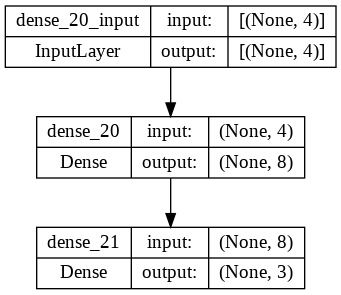

In [ ]:
# Plotando a arquitetura do modelo e salvando em um arquivo
plot_model(baseline_model(), to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Visualizando a arquitetura do modelo
visualizer(baseline_model(), format='png', view=True)

In [ ]:
# Imprimindo o resumo do modelo
print("Sumario:")
print(baseline_model().summary())

Sumario:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 40        
                                                                 
 dense_25 (Dense)            (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Criando o modelo
model = baseline_model()

In [ ]:
# Ajustando o modelo aos dados
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)
history = estimator.fit(X, dummy_y)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


30/30 [==============================] - 0s 2ms/step - loss: 1.1259 - accuracy: 0.3333 
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0763 - accuracy: 0.3533
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0387 - accuracy: 0.5733
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0088 - accuracy: 0.6600
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9798 - accuracy: 0.6600
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.6667
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.6667
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8983 - accuracy: 0.6667
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.6667
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.6667
Epoch 11/200
30/30 [

In [ ]:
# Acessando o histórico das métricas de treinamento
print(history.history)

{'loss': [1.1259413957595825,
  1.0763108730316162,
  1.0387135744094849,
  1.008834719657898,
  0.9797913432121277,
  0.9526060223579407,
  0.9255740642547607,
  0.8983157277107239,
  0.8709689378738403,
  0.8450021147727966,
  0.818357527256012,
  0.7924495339393616,
  0.7682181000709534,
  0.7429852485656738,
  0.718432605266571,
  0.6964185833930969,
  0.6741647124290466,
  0.6535186171531677,
  0.6349537372589111,
  0.617165744304657,
  0.6008691191673279,
  0.5862261056900024,
  0.5719157457351685,
  0.5594126582145691,
  0.5453827977180481,
  0.5339322686195374,
  0.5222535133361816,
  0.5126235485076904,
  0.5015902519226074,
  0.49171122908592224,
  0.48233067989349365,
  0.4732879102230072,
  0.46372857689857483,
  0.4549639821052551,
  0.447342187166214,
  0.4383334815502167,
  0.4303993284702301,
  0.4223926365375519,
  0.41456151008605957,
  0.40684470534324646,
  0.39998337626457214,
  0.3923718333244324,
  0.3859996795654297,
  0.3779708743095398,
  0.37029874324798584,


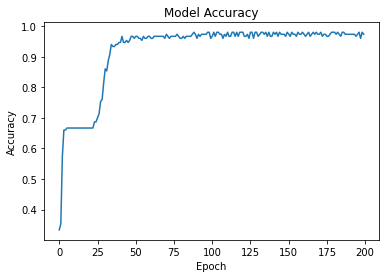

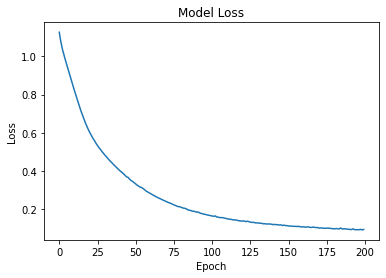

In [ ]:
# Plotando a acurácia do modelo ao longo das épocas
fig1 = plt.figure(1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plotando a perda do modelo ao longo das épocas
fig2 = plt.figure(2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Mostrando os gráficos
plt.show()

In [ ]:
# Converter o modelo para o formato JSON
model_json = estimator.model.to_json()
# Salvar a arquitetura do modelo em um arquivo JSON
with open("modelo_iris.json", "w") as json_file:
  json_file.write(model_json)

# Salvar os pesos do modelo em um arquivo HDF5
estimator.model.save_weights("modelo_iris.h5")

In [ ]:
# Fazer previsões usando o modelo treinado
estimator.predict([[5.8, 3., 3.8, 1.2]])
# Imprimir a classe prevista
print(prediction)

1/1 [==============================] - 0s 34ms/step


array([1])

In [ ]:
dummy_y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1
